# Unsupervised Learning

1. Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering (20 poin)
Langkah-langkah:

  a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

  b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

  c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain
 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


# Data Collection

##Load Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/flight.csv"
df = pd.read_csv(path)
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# EDA & Data Preprocessing

## Check Null and Missing Values

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
#Mengisi data yang kosong
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
#menghapus kolom work_city, work_province, work_country, gender
df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Duplicate Values

In [ ]:
df.duplicated().sum()

0

## Outlier with BoxPlot

In [ ]:
cat_cols = []   #membuat list categorical colums
for i in df.columns:  #untuk setiap i sebagai kolom yang ada di df
    if df[i].dtypes == 'object':  #jika kolom di df bertipe object maka dianggap sebagai categorical columns
        cat_cols.append(i)  #maka menambahkan categorical columns dengan kondisi bertipe object pada list cat_cols

In [ ]:
cat_cols

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
num_cols = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        num_cols.append(i)    #maka menambahkan column tersebut pada numerical columns

In [ ]:
num_cols

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

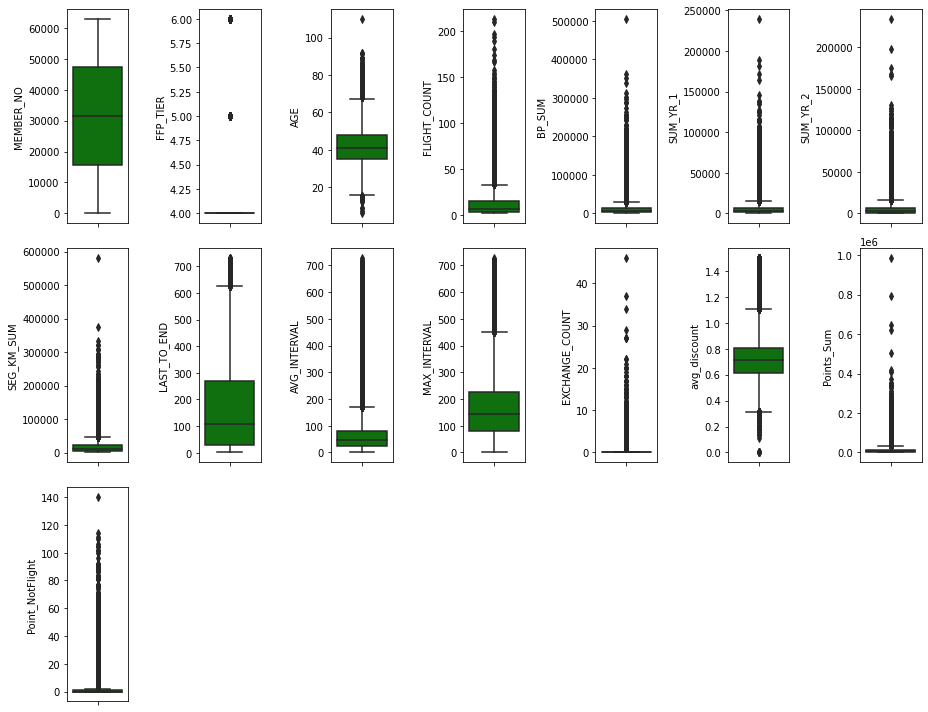

In [ ]:
plt.figure(figsize=(13, 10))
for i in range(0, len(num_cols)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[num_cols[i]],color='Green',orient='v')
    plt.tight_layout()

## Statistical Summary

In [ ]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62988.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.466502     11.839414   10925.081254   
std    18183.213715      0.373856      9.853632     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62988.000000   62988.000000   62988.000000  62988.000000   
mean     5333.022406    5597.823538   17123.878691    176.120102   
std      8077.407958    8694.832417   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1020.000000     785.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6524.250000    6826.250000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

# Feature Engineering

In [ ]:
df[df[['LAST_FLIGHT_DATE','FIRST_FLIGHT_DATE']] == '2014/2/29  0:00:00']


MEMBER_NO FFP_DATE FIRST_FLIGHT_DATE  FFP_TIER  AGE LOAD_TIME  \
0            NaN      NaN               NaN       NaN  NaN       NaN   
1            NaN      NaN               NaN       NaN  NaN       NaN   
2            NaN      NaN               NaN       NaN  NaN       NaN   
3            NaN      NaN               NaN       NaN  NaN       NaN   
4            NaN      NaN               NaN       NaN  NaN       NaN   
...          ...      ...               ...       ...  ...       ...   
62983        NaN      NaN               NaN       NaN  NaN       NaN   
62984        NaN      NaN               NaN       NaN  NaN       NaN   
62985        NaN      NaN               NaN       NaN  NaN       NaN   
62986        NaN      NaN               NaN       NaN  NaN       NaN   
62987        NaN      NaN               NaN       NaN  NaN       NaN   

       FLIGHT_COUNT  BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  \
0               NaN     NaN       NaN       NaN         NaN              NaN   
1               NaN     NaN       NaN       NaN         NaN              NaN   
2               NaN     NaN       NaN       NaN         NaN              NaN   
3               NaN     NaN       NaN       NaN         NaN              NaN   
4               NaN     NaN       NaN       NaN         NaN              NaN   
...             ...     ...       ...       ...         ...              ...   
62983           NaN     NaN       NaN       NaN         NaN              NaN   
62984           NaN     NaN       NaN       NaN         NaN              NaN   
62985           NaN     NaN       NaN       NaN         NaN              NaN   
62986           NaN     NaN       NaN       NaN         NaN              NaN   
62987           NaN     NaN       NaN       NaN         NaN              NaN   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
0              NaN           NaN           NaN             NaN           NaN   
1              NaN           NaN           NaN             NaN           NaN   
2              NaN           NaN           NaN             NaN           NaN   
3              NaN           NaN           NaN             NaN           NaN   
4              NaN           NaN           NaN             NaN           NaN   
...            ...           ...           ...             ...           ...   
62983          NaN           NaN           NaN             NaN           NaN   
62984          NaN           NaN           NaN             NaN           NaN   
62985          NaN           NaN           NaN             NaN           NaN   
62986          NaN           NaN           NaN             NaN           NaN   
62987          NaN           NaN           NaN             NaN           NaN   

       Points_Sum  Point_NotFlight  
0             NaN              NaN  
1             NaN              NaN  
2             NaN              NaN  
3             NaN              NaN  
4             NaN              NaN  
...           ...              ...  
62983         NaN              NaN  
62984         NaN              NaN  
62985         NaN              NaN  
62986         NaN              NaN  
62987         NaN              NaN  

[62988 rows x 19 columns]

In [ ]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [ ]:
df[['LAST_FLIGHT_DATE','FIRST_FLIGHT_DATE']] = df[['LAST_FLIGHT_DATE','FIRST_FLIGHT_DATE']].astype('category')
df_date=df.select_dtypes(include='category')
df_date.head(5)

FIRST_FLIGHT_DATE LAST_FLIGHT_DATE
0        12/24/2008        3/31/2014
1          8/3/2007        3/25/2014
2         8/30/2007        3/21/2014
3         8/23/2008       12/26/2013
4         4/15/2009        3/27/2014

In [ ]:
df["FIRST_FLIGHT_DATE"] = pd.to_datetime(df["FIRST_FLIGHT_DATE"])
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"])
df["FIRST_FLIGHT_DATE"] = df["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
df["LAST_FLIGHT_DATE"] = df["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [ ]:
df['loyality'] = ( df['LAST_FLIGHT_DATE'] - df['FIRST_FLIGHT_DATE']) /np.timedelta64(1,'Y')
df


MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  FFP_TIER   AGE  LOAD_TIME  \
0          54993  11/2/2006        2008-12-24         6  31.0  3/31/2014   
1          28065  2/19/2007        2007-08-03         6  42.0  3/31/2014   
2          55106   2/1/2007        2007-08-30         6  40.0  3/31/2014   
3          21189  8/22/2008        2008-08-23         5  64.0  3/31/2014   
4          39546  4/10/2009        2009-04-15         6  48.0  3/31/2014   
...          ...        ...               ...       ...   ...        ...   
62983      18375  5/20/2011        2013-06-05         4  25.0  3/31/2014   
62984      36041   3/8/2010        2013-09-14         4  38.0  3/31/2014   
62985      45690  3/30/2006        2006-12-02         4  43.0  3/31/2014   
62986      61027   2/6/2013        2013-02-14         4  36.0  3/31/2014   
62987      61340  2/17/2013        2013-02-17         4  29.0  3/31/2014   

       FLIGHT_COUNT  BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  \
0               210  505308  239560.0  234188.0      580717       2014-03-31   
1               140  362480  171483.0  167434.0      293678       2014-03-25   
2               135  351159  163618.0  164982.0      283712       2014-03-21   
3                23  337314  116350.0  125500.0      281336       2013-12-26   
4               152  273844  124560.0  130702.0      309928       2014-03-27   
...             ...     ...       ...       ...         ...              ...   
62983             2       0       0.0       0.0        1134       2013-06-09   
62984             4       0       0.0       0.0        8016       2014-01-03   
62985             2       0       0.0       0.0        2594       2014-03-03   
62986             2       0       0.0       0.0        3934       2013-02-26   
62987             2       0    2800.0       0.0        4222       2013-02-23   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
0                1      3.483254            18              34      0.961639   
1                7      5.194245            17              29      1.252314   
2               11      5.298507            18              20      1.254676   
3               97     27.863636            73              11      1.090870   
4                5      4.788079            47              27      0.970658   
...            ...           ...           ...             ...           ...   
62983          297      4.000000             4               1      0.000000   
62984           89     37.000000            60              14      0.000000   
62985           29    166.000000           166               0      0.000000   
62986          400     12.000000            12               0      0.000000   
62987          403      6.000000             6               0      0.000000   

       Points_Sum  Point_NotFlight  loyality  
0          619760               50  5.264995  
1          415768               33  6.642162  
2          406361               26  6.557287  
3          372204               12  5.341657  
4          338813               39  4.947398  
...           ...              ...       ...  
62983       12318               22  0.010952  
62984      106972               43  0.303908  
62985           0                0  7.249978  
62986           0                0  0.032855  
62987           0                0  0.016427  

[62988 rows x 20 columns]

In [ ]:
df[cat_cols].describe()

FFP_DATE    FIRST_FLIGHT_DATE  LOAD_TIME     LAST_FLIGHT_DATE
count       62988                62988      62988                62988
unique       3068                 3406          1                  730
top     1/13/2011  2013-02-16 00:00:00  3/31/2014  2014-03-31 00:00:00
freq          184                   96      62988                  959
first         NaN  1905-12-31 00:00:00        NaN  2012-04-01 00:00:00
last          NaN  2015-05-30 00:00:00        NaN  2014-03-31 00:00:00

In [ ]:
df[cat_cols].head(5)

FFP_DATE FIRST_FLIGHT_DATE  LOAD_TIME LAST_FLIGHT_DATE
0  11/2/2006        2008-12-24  3/31/2014       2014-03-31
1  2/19/2007        2007-08-03  3/31/2014       2014-03-25
2   2/1/2007        2007-08-30  3/31/2014       2014-03-21
3  8/22/2008        2008-08-23  3/31/2014       2013-12-26
4  4/10/2009        2009-04-15  3/31/2014       2014-03-27

In [ ]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62988.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.466502     11.839414   10925.081254   
std    18183.213715      0.373856      9.853632     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62988.000000   62988.000000   62988.000000  62988.000000   
mean     5333.022406    5597.823538   17123.878691    176.120102   
std      8077.407958    8694.832417   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1020.000000     785.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6524.250000    6826.250000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight      loyality  
count     62988.000000  62988.000000  
mean          2.728155      3.098934  
std           7.364164      2.464819  
min           0.000000     -1.278603  
25%           0.000000      1.117066  
50%           0.000000      2.505185  
75%           1.000000      4.835144  
max         140.000000    108.202085

# EDA 2

## Distribution Plot

In [ ]:
num_cols = []   #membuat list numerical colums
for i in df.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        num_cols.append(i)    #maka menambahkan column tersebut pada numerical columns

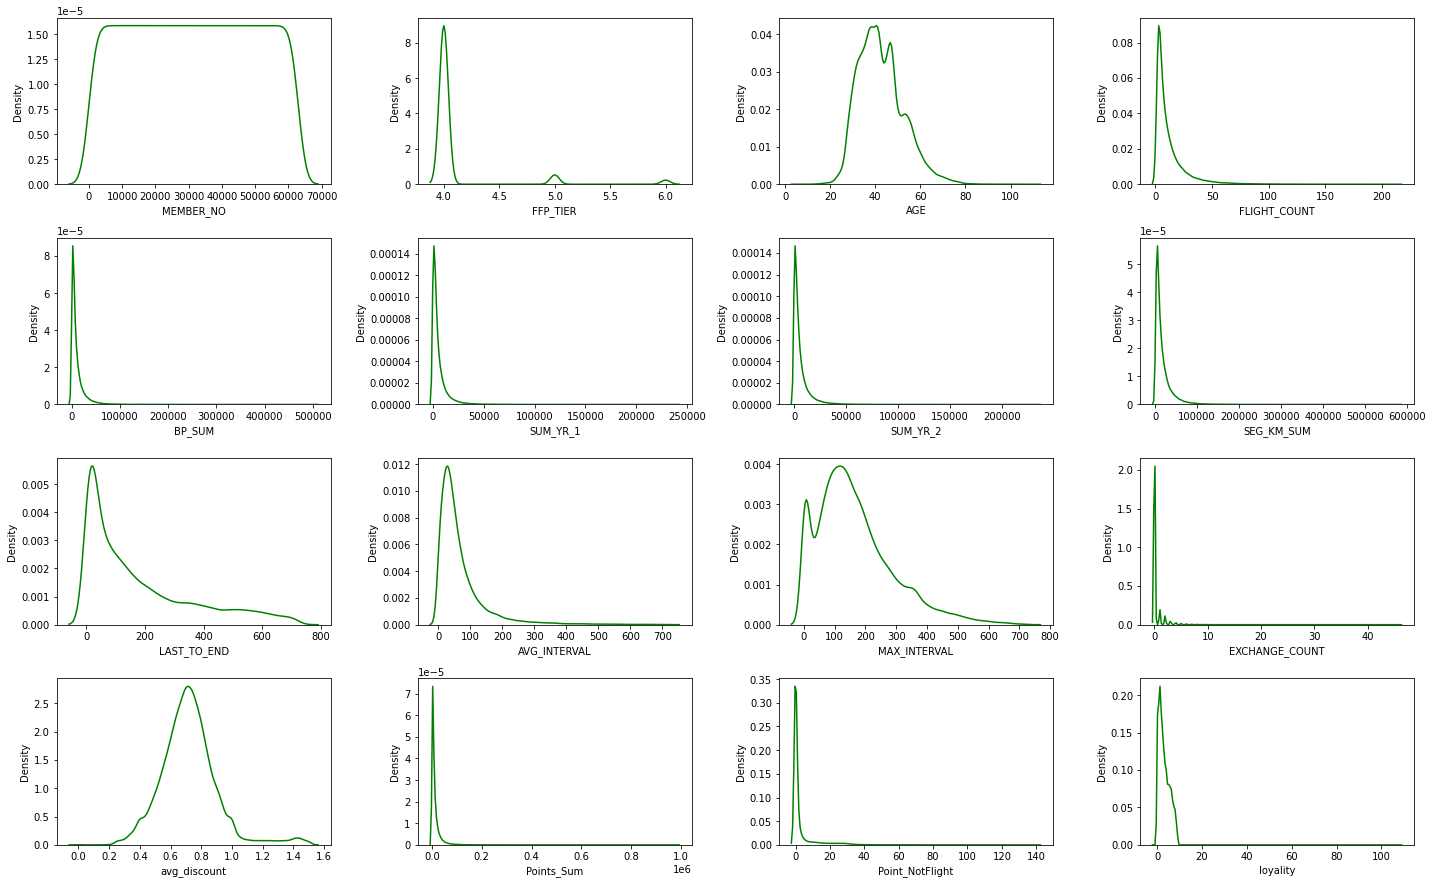

In [ ]:
#distribusi variabel pada kolom-kolom num_cols
features = num_cols
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(5 , 4 , i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

In [ ]:
#ketentuan discount tidak boleh lebih dari 100%
df = df[df['avg_discount']<=1]


## Count Plot

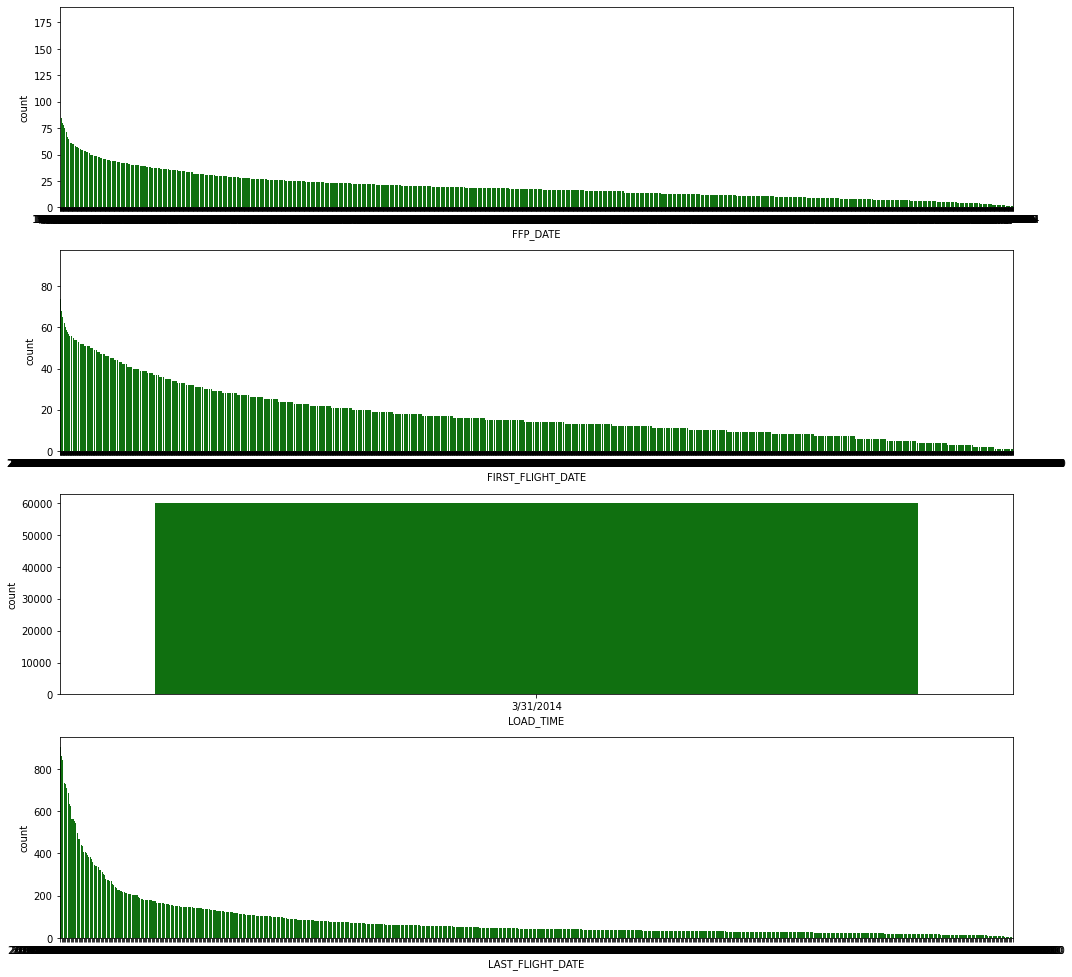

In [ ]:
features = cat_cols
plt.figure(figsize=(15, 20))
for i in range(0, len(features)):
  plt.subplot(6, 1, i+1)
  sns.countplot(x = df[features[i]], order=df[features[i]].value_counts().index, color = 'green')
  plt.tight_layout()

## Pair Plot

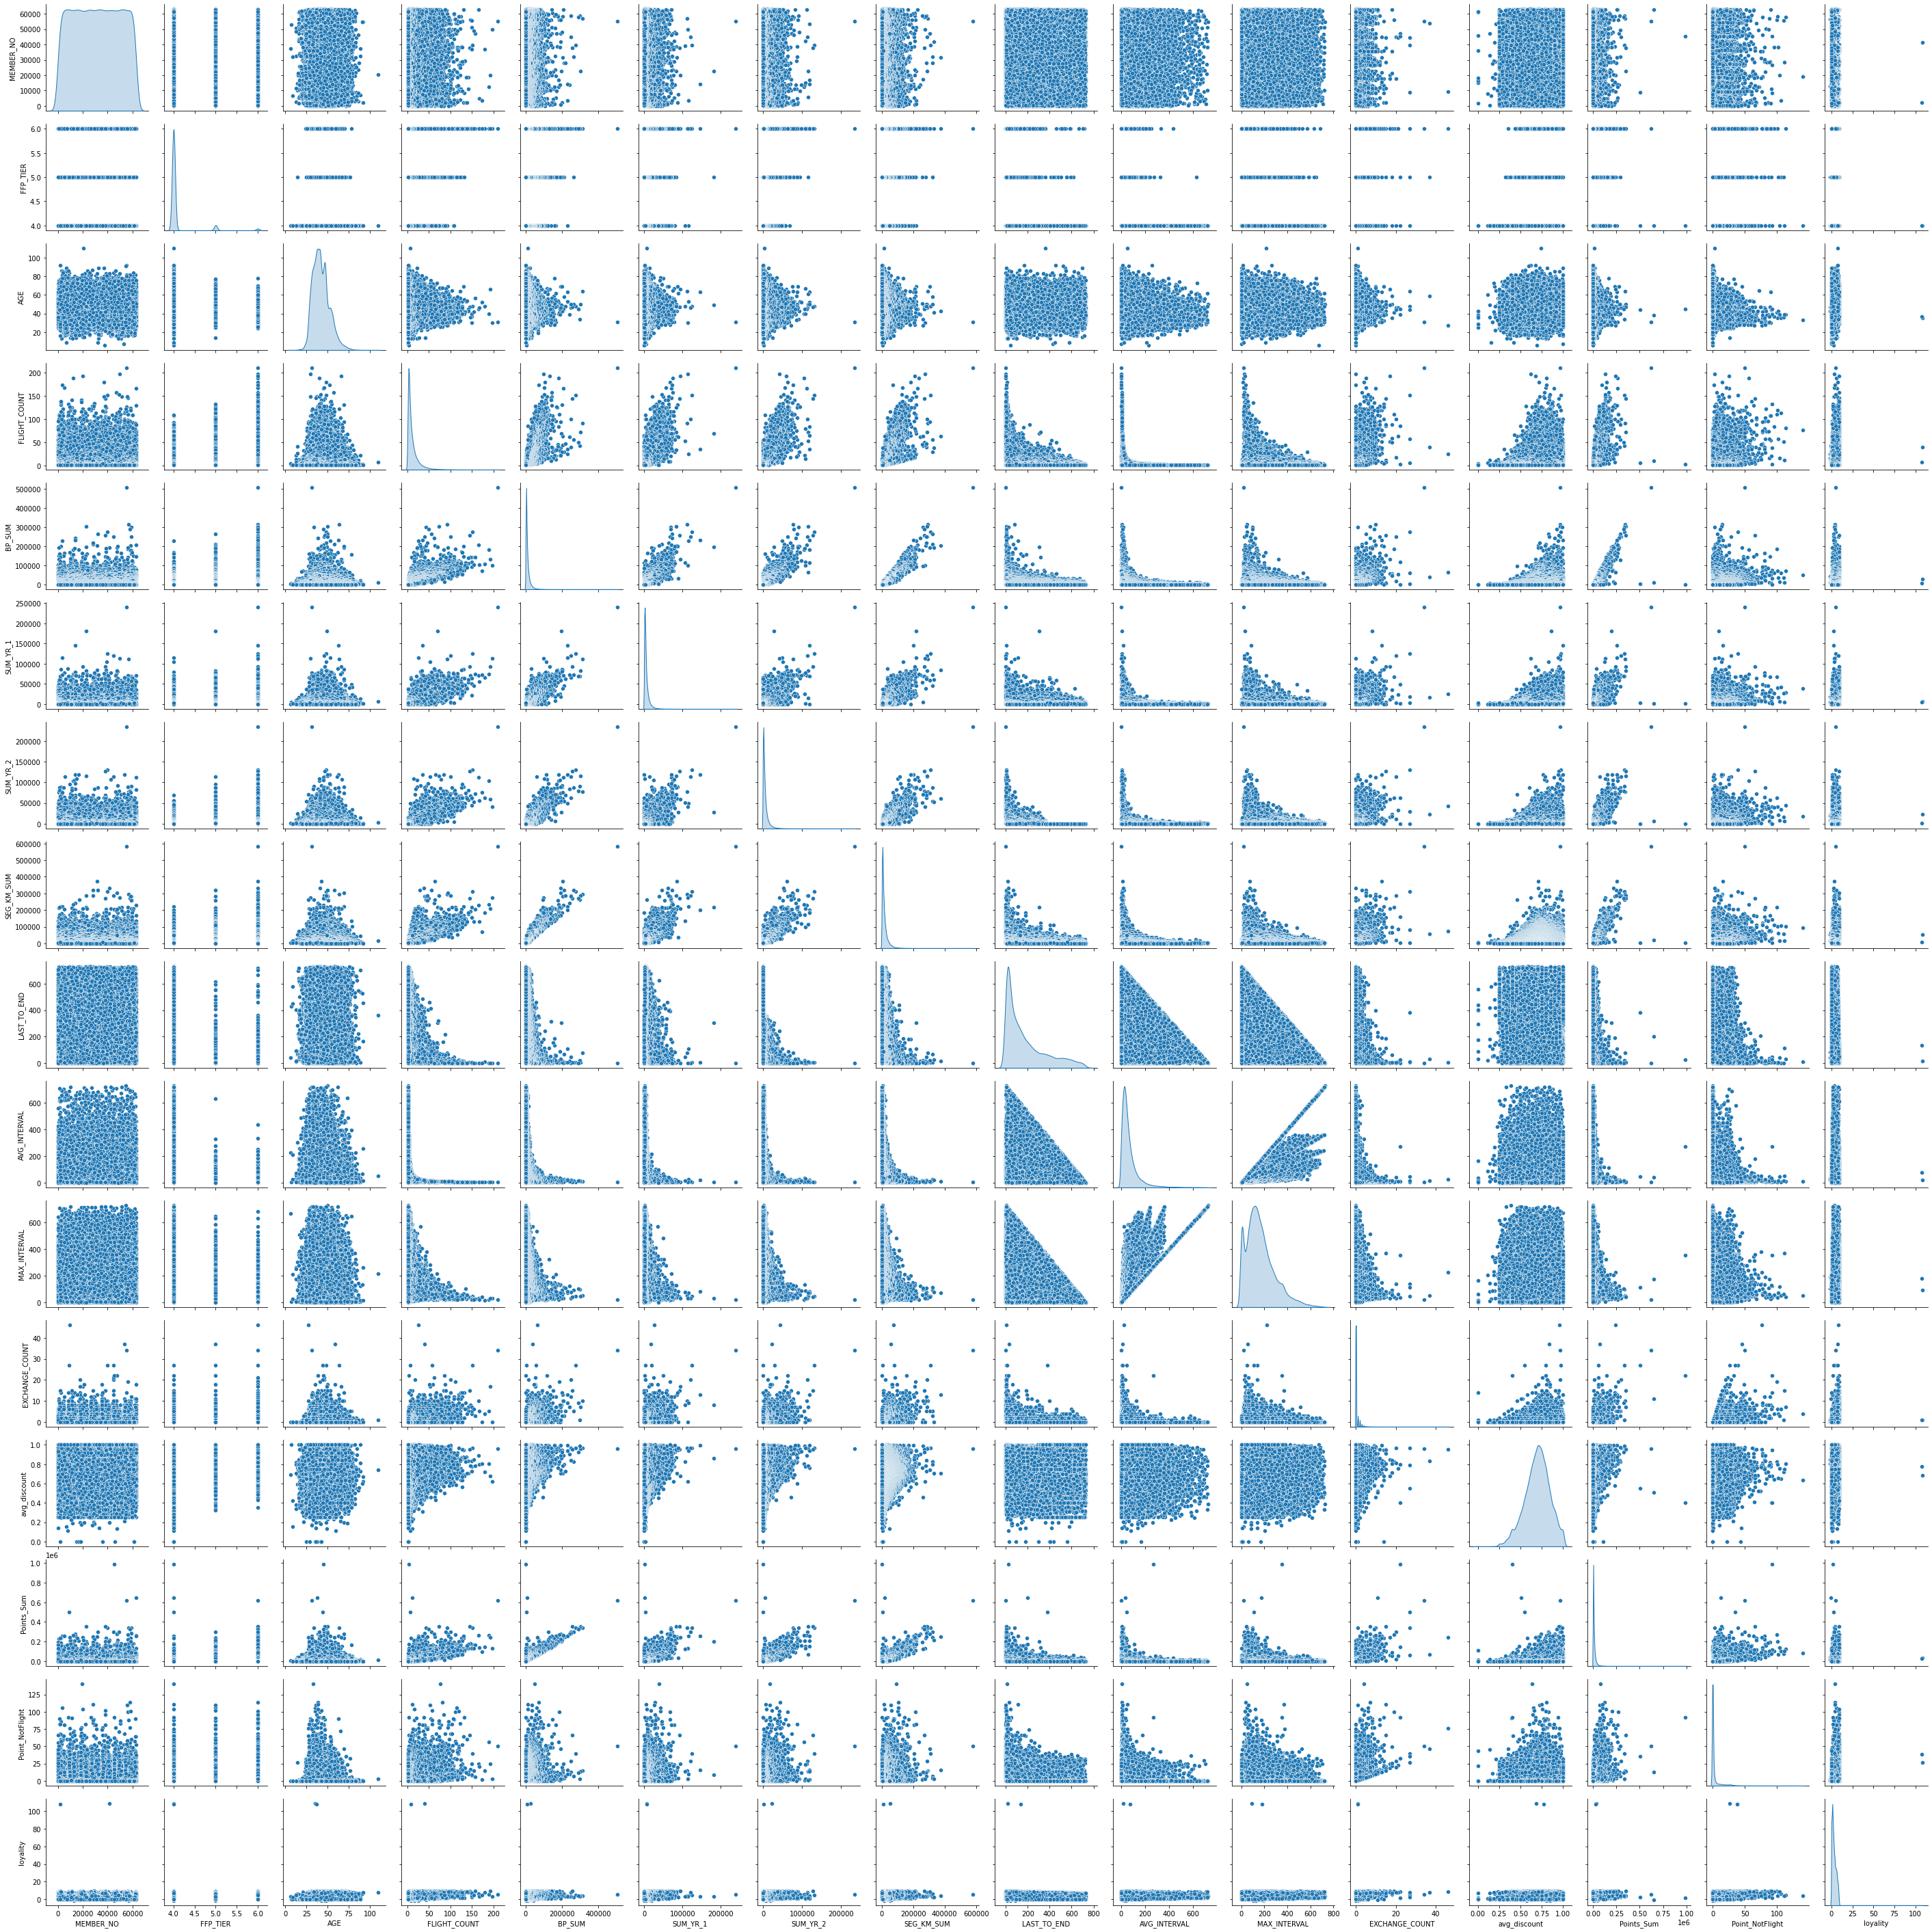

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

## Correlation

In [ ]:
df.corr()

MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.009518  0.001994     -0.000871 -0.001955   
FFP_TIER         -0.009518  1.000000  0.041329      0.597321  0.555944   
AGE               0.001994  0.041329  1.000000      0.065322  0.074245   
FLIGHT_COUNT     -0.000871  0.597321  0.065322      1.000000  0.825612   
BP_SUM           -0.001955  0.555944  0.074245      0.825612  1.000000   
SUM_YR_1         -0.003196  0.434922  0.089078      0.777458  0.839374   
SUM_YR_2         -0.002203  0.589902  0.060915      0.822955  0.874456   
SEG_KM_SUM       -0.001197  0.526728  0.080330      0.854313  0.948693   
LAST_TO_END      -0.001462 -0.196264 -0.021158     -0.404910 -0.336822   
AVG_INTERVAL      0.001735 -0.142943 -0.024921     -0.315522 -0.259840   
MAX_INTERVAL      0.004332 -0.126851  0.010778     -0.182482 -0.147626   
EXCHANGE_COUNT   -0.005786  0.339518  0.017803      0.500576  0.520590   
avg_discount      0.004942  0.125028  0.054317      0.135568  0.235005   
Points_Sum       -0.006529  0.534722  0.048771      0.764197  0.907668   
Point_NotFlight  -0.034484  0.197847 -0.095239      0.282041  0.245978   
loyality         -0.029817  0.149959  0.250781      0.301675  0.259894   

                 SUM_YR_1  SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
MEMBER_NO       -0.003196 -0.002203   -0.001197    -0.001462      0.001735   
FFP_TIER         0.434922  0.589902    0.526728    -0.196264     -0.142943   
AGE              0.089078  0.060915    0.080330    -0.021158     -0.024921   
FLIGHT_COUNT     0.777458  0.822955    0.854313    -0.404910     -0.315522   
BP_SUM           0.839374  0.874456    0.948693    -0.336822     -0.259840   
SUM_YR_1         1.000000  0.641816    0.820653    -0.192712     -0.253304   
SUM_YR_2         0.641816  1.000000    0.864348    -0.445366     -0.255333   
SEG_KM_SUM       0.820653  0.864348    1.000000    -0.371269     -0.280467   
LAST_TO_END     -0.192712 -0.445366   -0.371269     1.000000     -0.112501   
AVG_INTERVAL    -0.253304 -0.255333   -0.280467    -0.112501      1.000000   
MAX_INTERVAL    -0.141087 -0.152301   -0.149985    -0.349276      0.723004   
EXCHANGE_COUNT   0.474915  0.455876    0.497979    -0.168819     -0.128845   
avg_discount     0.201356  0.157893    0.087094    -0.005450     -0.046118   
Points_Sum       0.763020  0.804107    0.861589    -0.302600     -0.227464   
Point_NotFlight  0.234505  0.238261    0.249107    -0.121334     -0.072076   
loyality         0.250249  0.241803    0.273642    -0.298426     -0.006141   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
MEMBER_NO            0.004332       -0.005786      0.004942   -0.006529   
FFP_TIER            -0.126851        0.339518      0.125028    0.534722   
AGE                  0.010778        0.017803      0.054317    0.048771   
FLIGHT_COUNT        -0.182482        0.500576      0.135568    0.764197   
BP_SUM              -0.147626        0.520590      0.235005    0.907668   
SUM_YR_1            -0.141087        0.474915      0.201356    0.763020   
SUM_YR_2            -0.152301        0.455876      0.157893    0.804107   
SEG_KM_SUM          -0.149985        0.497979      0.087094    0.861589   
LAST_TO_END         -0.349276       -0.168819     -0.005450   -0.302600   
AVG_INTERVAL         0.723004       -0.128845     -0.046118   -0.227464   
MAX_INTERVAL         1.000000       -0.084761     -0.012242   -0.132222   
EXCHANGE_COUNT      -0.084761        1.000000      0.085736    0.582066   
avg_discount        -0.012242        0.085736      1.000000    0.193153   
Points_Sum          -0.132222        0.582066      0.193153    1.000000   
Point_NotFlight     -0.038108        0.391823     -0.013096    0.425482   
loyality             0.133412        0.265094      0.076388    0.241136   

                 Point_NotFlight  loyality  
MEMBER_NO              -0.034484 -0.029817  
FFP_TIER                0.197847  0.149959  
AGE                 

## Correlation with Heatmap

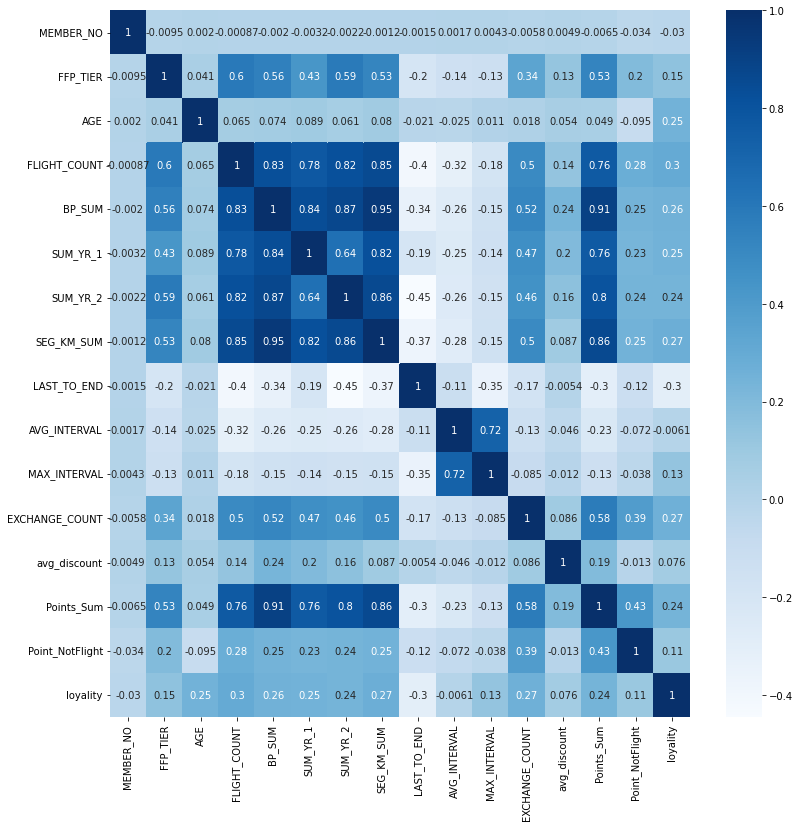

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True);

In [ ]:
dfa = df.drop(['MEMBER_NO','AGE','SUM_YR_1','SUM_YR_2','AVG_INTERVAL','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','EXCHANGE_COUNT','Point_NotFlight'	], axis = 1)

In [ ]:
dfa.head()

FFP_DATE  FFP_TIER  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SEG_KM_SUM  \
0  11/2/2006         6  3/31/2014           210  505308      580717   
4  4/10/2009         6  3/31/2014           152  273844      309928   
5  2/10/2008         6  3/31/2014            92  313338      294585   
6  3/22/2006         6  3/31/2014           101  248864      287042   
7   4/9/2010         6  3/31/2014            73  301864      287230   

   LAST_TO_END  MAX_INTERVAL  avg_discount  Points_Sum  loyality  
0            1            18      0.961639      619760  5.264995  
4            5            47      0.970658      338813  4.947398  
5           79            52      0.967692      343121  4.290300  
6            1            28      0.965347      298873  8.005640  
7            3            45      0.962070      351198  3.969965

## Correlation 2

In [ ]:
dfa.corr()

FFP_TIER  FLIGHT_COUNT    BP_SUM  SEG_KM_SUM  LAST_TO_END  \
FFP_TIER      1.000000      0.597321  0.555944    0.526728    -0.196264   
FLIGHT_COUNT  0.597321      1.000000  0.825612    0.854313    -0.404910   
BP_SUM        0.555944      0.825612  1.000000    0.948693    -0.336822   
SEG_KM_SUM    0.526728      0.854313  0.948693    1.000000    -0.371269   
LAST_TO_END  -0.196264     -0.404910 -0.336822   -0.371269     1.000000   
MAX_INTERVAL -0.126851     -0.182482 -0.147626   -0.149985    -0.349276   
avg_discount  0.125028      0.135568  0.235005    0.087094    -0.005450   
Points_Sum    0.534722      0.764197  0.907668    0.861589    -0.302600   
loyality      0.149959      0.301675  0.259894    0.273642    -0.298426   

              MAX_INTERVAL  avg_discount  Points_Sum  loyality  
FFP_TIER         -0.126851      0.125028    0.534722  0.149959  
FLIGHT_COUNT     -0.182482      0.135568    0.764197  0.301675  
BP_SUM           -0.147626      0.235005    0.907668  0.259894  
SEG_KM_SUM       -0.149985      0.087094    0.861589  0.273642  
LAST_TO_END      -0.349276     -0.005450   -0.302600 -0.298426  
MAX_INTERVAL      1.000000     -0.012242   -0.132222  0.133412  
avg_discount     -0.012242      1.000000    0.193153  0.076388  
Points_Sum       -0.132222      0.193153    1.000000  0.241136  
loyality          0.133412      0.076388    0.241136  1.000000

## Correlation with Heatmap 2

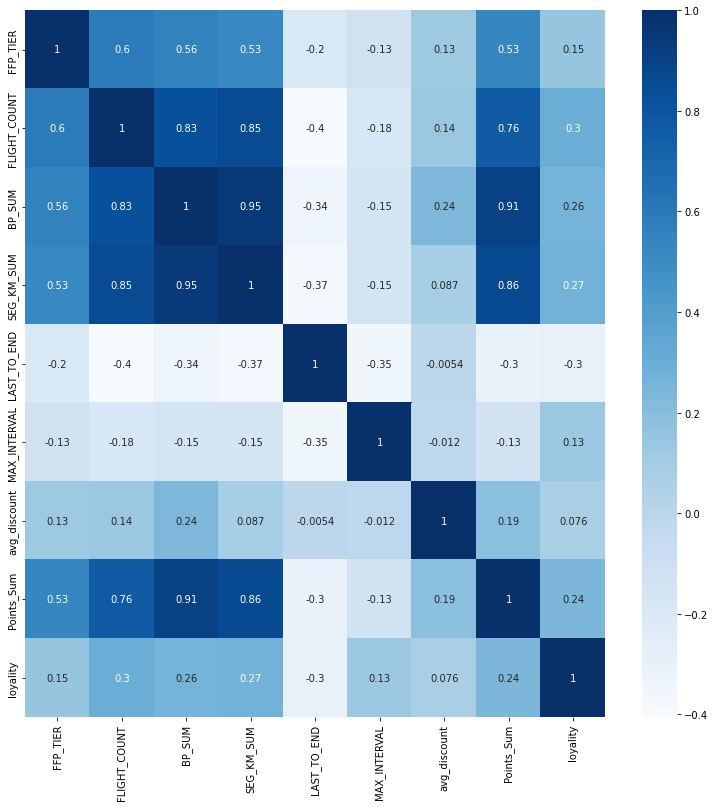

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(dfa.corr(), cmap = 'Blues', annot = True);

In [ ]:
dfb = dfa.drop(['Points_Sum','BP_SUM'], axis = 1)

In [ ]:
dfb.head()

FFP_DATE  FFP_TIER  LOAD_TIME  FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  \
0  11/2/2006         6  3/31/2014           210      580717            1   
4  4/10/2009         6  3/31/2014           152      309928            5   
5  2/10/2008         6  3/31/2014            92      294585           79   
6  3/22/2006         6  3/31/2014           101      287042            1   
7   4/9/2010         6  3/31/2014            73      287230            3   

   MAX_INTERVAL  avg_discount  loyality  
0            18      0.961639  5.264995  
4            47      0.970658  4.947398  
5            52      0.967692  4.290300  
6            28      0.965347  8.005640  
7            45      0.962070  3.969965

In [ ]:
num_cols = []   #membuat list numerical colums
for i in dfb.columns:       #untuk setiap i sebagai kolom yang ada di df
    if i not in cat_cols:    #jika kolom di df bukan merupakan bagian dari list cat_cols
        num_cols.append(i)    #maka menambahkan column tersebut pada numerical columns

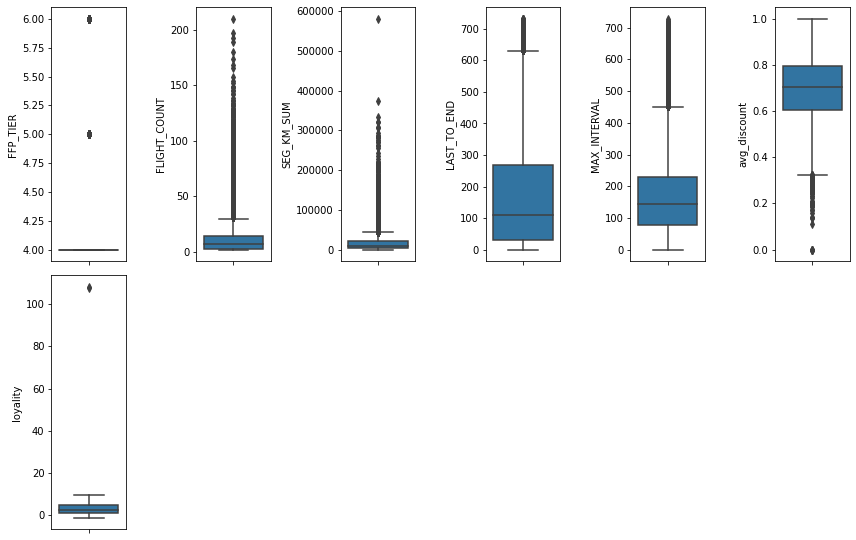

In [ ]:
plt.figure(figsize = (12,15))
for i in range(0, len(num_cols)):
    plt.subplot(4, 6, i+1)
    sns.boxplot(y = dfb[num_cols[i]], orient='v')
    plt.tight_layout()

## Handling Outlier

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(dfb)}')

filtered_entries = np.array([True] * len(dfb))

for col in num_cols:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfc = dfb[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfc)}')

Jumlah baris sebelum memfilter outlier: 60041
Jumlah baris setelah memfilter outlier: 56862


In [ ]:
dfc = dfc.drop(['FFP_TIER','FFP_DATE', 'LOAD_TIME'], axis = 1)

In [ ]:
dfc.isna().sum()

FLIGHT_COUNT    0
SEG_KM_SUM      0
LAST_TO_END     0
MAX_INTERVAL    0
avg_discount    0
loyality        0
dtype: int64

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56862 entries, 920 to 62978
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FLIGHT_COUNT  56862 non-null  int64  
 1   SEG_KM_SUM    56862 non-null  int64  
 2   LAST_TO_END   56862 non-null  int64  
 3   MAX_INTERVAL  56862 non-null  int64  
 4   avg_discount  56862 non-null  float64
 5   loyality      56862 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 3.0 MB


# Selection

Fitur yang dipilih yaitu:

In [ ]:
dfc.head()

FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  MAX_INTERVAL  avg_discount  \
920             13       75939           30           287      0.965910   
949             27       72382          130           110      0.997066   
986             43       76616            7            91      0.929799   
1004             8       75179           27           242      0.942247   
1023            51       70410           58            74      0.996027   

      loyality  
920   2.510661  
949   1.305982  
986   6.425868  
1004  3.863187  
1023  2.784451

# Scaling

In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(dfc.astype(float))
data_std

array([[ 0.30466224,  4.48065824, -0.83103719,  1.06685816,  1.89917673,
        -0.20489561],
       [ 1.7719734 ,  4.22151774, -0.29071058, -0.47060886,  2.11746564,
        -0.71685766],
       [ 3.44890043,  4.52998017, -0.95531231, -0.6356477 ,  1.64617328,
         1.45898106],
       ...,
       [-0.8482251 , -1.02496644, -0.51224449, -0.81805904,  0.10619586,
         2.2792839 ],
       [-0.8482251 , -1.02496644, -0.33933997, -1.40872433, -0.17405592,
        -1.26954396],
       [-0.8482251 , -0.9964078 ,  0.53058587, -1.42609684, -2.90651077,
        -0.33870387]])

# Modeling

2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering! (20 poin)
Langkah-langkah:

  a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut

  b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).
  
3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score (30 poin)
Langkah-langkah:
  a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method

  b. Lakukan clustering menggunakan K-means

  c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA apabila diperlukan
Untuk mempermudah kamu, yuk lihat resource di bawah ini:

  ● Topic Unsupervised Learning - Clustering bagian KMeans dan Evaluasi
 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(data_std)
	kmeanModel.fit(data_std)

	distortions.append(sum(np.min(cdist(data_std, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / data_std.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(data_std, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / data_std.shape[0]
	mapping2[k] = kmeanModel.inertia_


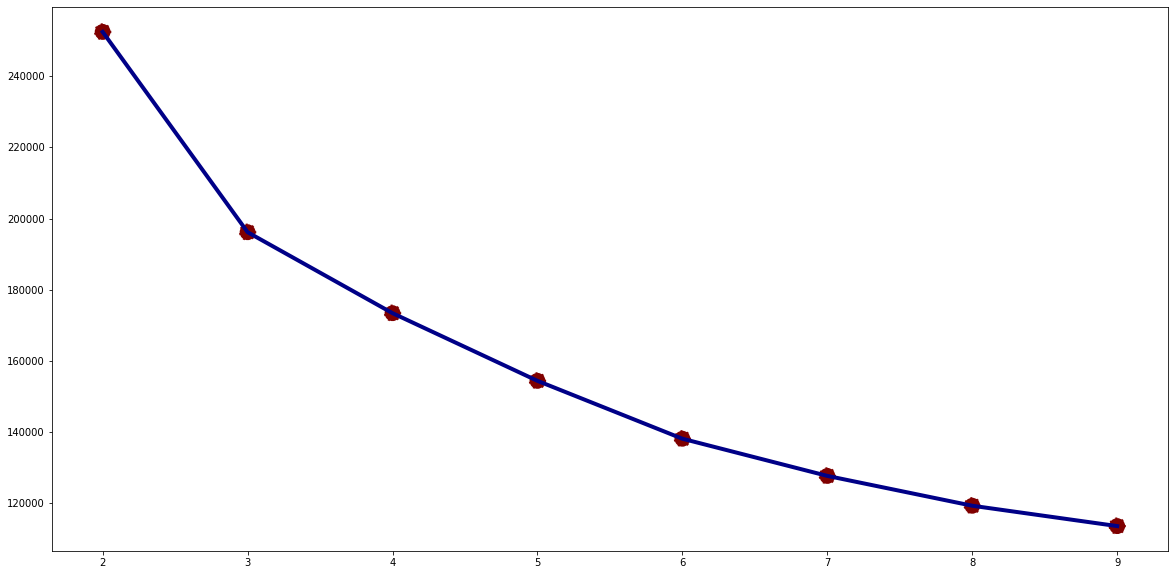

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 341172.0000000001
2 : 252549.79311155126
3 : 196142.8636024762
4 : 173341.87600167576
5 : 154281.638238476
6 : 137981.326566557
7 : 127513.40410109918
8 : 119109.61872290885
9 : 113379.79636030273


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(dfc))

In [ ]:
df_data_std['clusters'] = kmeans.labels_



In [ ]:
df_data_std

FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  MAX_INTERVAL  avg_discount  \
0          0.304662    4.480658    -0.831037      1.066858      1.899177   
1          1.771973    4.221518    -0.290711     -0.470609      2.117466   
2          3.448900    4.529980    -0.955312     -0.635648      1.646173   
3         -0.219377    4.425289    -0.847247      0.675977      1.733383   
4          4.287364    4.077850    -0.679746     -0.783314      2.110188   
...             ...         ...          ...           ...           ...   
56857     -0.848225   -1.024966     1.233010     -1.373979      0.386448   
56858     -0.848225   -0.996408     0.935831     -1.391352     -2.416070   
56859     -0.848225   -1.024966    -0.512244     -0.818059      0.106196   
56860     -0.848225   -1.024966    -0.339340     -1.408724     -0.174056   
56861     -0.848225   -0.996408     0.530586     -1.426097     -2.906511   

       loyality  clusters  
0     -0.204896         1  
1     -0.716858         1  
2      1.458981         1  
3      0.369898         1  
4     -0.088541         1  
...         ...       ...  
56857 -1.264890         0  
56858 -1.267217         0  
56859  2.279284         2  
56860 -1.269544         0  
56861 -0.338704         0  

[56862 rows x 7 columns]

In [ ]:
df_data_std.head(3)

FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  MAX_INTERVAL  avg_discount  \
0      0.304662    4.480658    -0.831037      1.066858      1.899177   
1      1.771973    4.221518    -0.290711     -0.470609      2.117466   
2      3.448900    4.529980    -0.955312     -0.635648      1.646173   

   loyality  clusters  
0 -0.204896         1  
1 -0.716858         1  
2  1.458981         1

In [ ]:
df_data_std.tail(5)

FLIGHT_COUNT  SEG_KM_SUM  LAST_TO_END  MAX_INTERVAL  avg_discount  \
56857     -0.848225   -1.024966     1.233010     -1.373979      0.386448   
56858     -0.848225   -0.996408     0.935831     -1.391352     -2.416070   
56859     -0.848225   -1.024966    -0.512244     -0.818059      0.106196   
56860     -0.848225   -1.024966    -0.339340     -1.408724     -0.174056   
56861     -0.848225   -0.996408     0.530586     -1.426097     -2.906511   

       loyality  clusters  
56857 -1.264890         0  
56858 -1.267217         0  
56859  2.279284         2  
56860 -1.269544         0  
56861 -0.338704         0

# Evaluasi

In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_data_std)
pcs = pca.transform(df_data_std)


In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df_data_std['clusters']
data_pca.head(10)

PC 1      PC 2  clusters
0  2.911242  1.455472         1
1  2.725204  3.079289         1
2  4.746786  3.696085         1
3  2.748318  1.401901         1
4  4.240544  4.146930         1
5  4.899893  4.096999         1
6  4.796516  4.061141         1
7  4.319724  3.808193         1
8  2.739823  1.285955         1
9  2.995815  2.791005         1

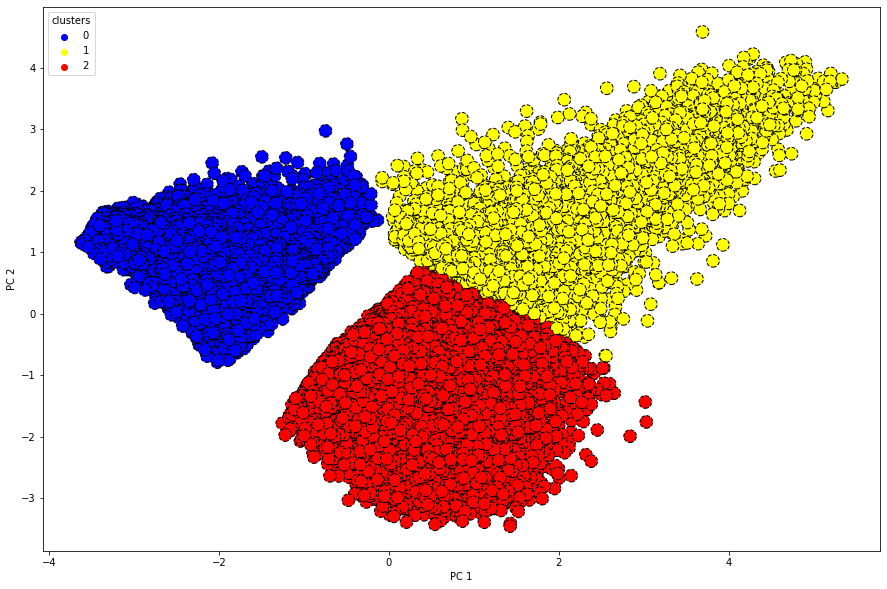

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','yellow','red'],
    s=160,
    ax=ax
)

# Insight

4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan (30 poin)
Langkah-langkah:

  a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

  b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster

  c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi strategi bisnis untuk stakeholder!

Untuk mempermudah kamu, yuk lihat resource di bawah ini:
● Topic Unsupervised Learning - Clustering
 

In [ ]:
dfc['clusters'] = kmeans.labels_
display(dfc.groupby('clusters').agg(['mean','median']))

FLIGHT_COUNT           SEG_KM_SUM          LAST_TO_END         \
                 mean median          mean   median        mean median   
clusters                                                                 
0            3.897131    3.0   5933.330305   4302.0  403.556964  408.0   
1           25.973121   24.0  36741.039221  33815.5   51.621412   27.0   
2            7.694149    7.0  10953.255772   9734.5  107.393608   85.0   

         MAX_INTERVAL        avg_discount            loyality            
                 mean median         mean    median      mean    median  
clusters                                                                 
0           68.417753   54.0     0.688940  0.700000  1.532656  0.728283  
1          124.977692  116.0     0.721879  0.720198  4.316226  3.967227  
2          233.742790  217.0     0.688096  0.693879  3.333698  2.765286

* cluster 0 : Customer baru < 1 tahun dengan frekuensi penerbangan sedikit < 4 kali dan jarak penerbangan yang cukup dekat < 6000 km
* cluster 1 : Customer lama 4 tahun dengan frekuensi penerbangan tinggi > 24 kali dan jarak penerbangan yang cukup jauh > 36000 km
* cluster 2 : Customer dengan lama terdaftar 3 tahun dengan frekuensi penerbangan sebanyak 7 kali dan jarak penerbangan yang cukup dekat > 9000 km

# Rekomendasi

Berdasarkan tabel di atas, rata-rata besaran diskon masing-masing relatif sama yaitu sebesar 60% hingga 70% agar mereka tetap berlangganan. 

* Besaran diskon yang disesuaikan dengan cluster, contohnya diskon yang lebih besar diberikan untuk pelanggan yang sudah melakukan penerbangan jarak jauh

* Untuk mempertahankan pelanggan lama dan menarik pelanggan baru, perlu adanya peningkatan kualitas layanan, seperti menambah rute penerbangan, frekuensi penerbangan, serta melakukan kerjasama dengan aplikasi layanan booking pesawat.